In [51]:
import os
from scipy.io import wavfile
import IPython.display as ipd
import librosa
import librosa.display as libdisp
import numpy as np
from scipy.signal import get_window
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df = pd.DataFrame(columns=['Filename','Gender','Disease'])
df_aux = pd.DataFrame(columns=['Filename','Gender','Disease'])
PATH = 'Pataka'
counter = 1
for directory in sorted(os.listdir(PATH)):
    if(directory == 'HC'):
        df['Filename'] = sorted(os.listdir(PATH+'/'+directory))
        df['Disease'] = 0
    elif (directory == 'PD'):
        df_aux['Filename'] = sorted(os.listdir(PATH+'/'+directory))
        df_aux['Disease'] = 1
        df = pd.concat([df, df_aux], ignore_index=True)
df.to_csv('labels.csv')

In [60]:
#TRAIN_PATH = '/content/gdrive/My Drive/Gita/Pataka/'
woman_healthy = 'HC/AVPEPUDEAC0001_pataka.wav'
man_healthy = 'HC/AVPEPUDEAC0003_pataka.wav'
woman_parkinson = 'PD/AVPEPUDEA0002_pataka.wav'
man_parkinson = 'PD/AVPEPUDEA0001_petaka.wav'
filenames = [woman_healthy, man_healthy, woman_parkinson, man_parkinson]

In [64]:
for filename in filenames:
    sample_rate, audio = wavfile.read(PATH +'/'+ filename)
    print("Sample rate: {0}Hz".format(sample_rate))
    print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 3.893061224489796s
Sample rate: 44100Hz
Audio duration: 6.537687074829932s
Sample rate: 44100Hz
Audio duration: 6.533968253968254s
Sample rate: 44100Hz
Audio duration: 3.5493877551020407s


In [67]:
SAMPLE_RATE = 44100
audio_wh, sr_wh = librosa.core.load(PATH + '/' + woman_healthy, sr=SAMPLE_RATE)
audio_mh, sr_mh = librosa.core.load(PATH+ '/' + man_healthy, sr=SAMPLE_RATE)
audio_wp, sr_wp = librosa.core.load(PATH+ '/' + woman_parkinson, sr=SAMPLE_RATE)
audio_mp, sr_mp = librosa.core.load(PATH+ '/' + man_parkinson, sr=SAMPLE_RATE)

ipd.Audio(data=audio_wh, rate=SAMPLE_RATE)

In [68]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

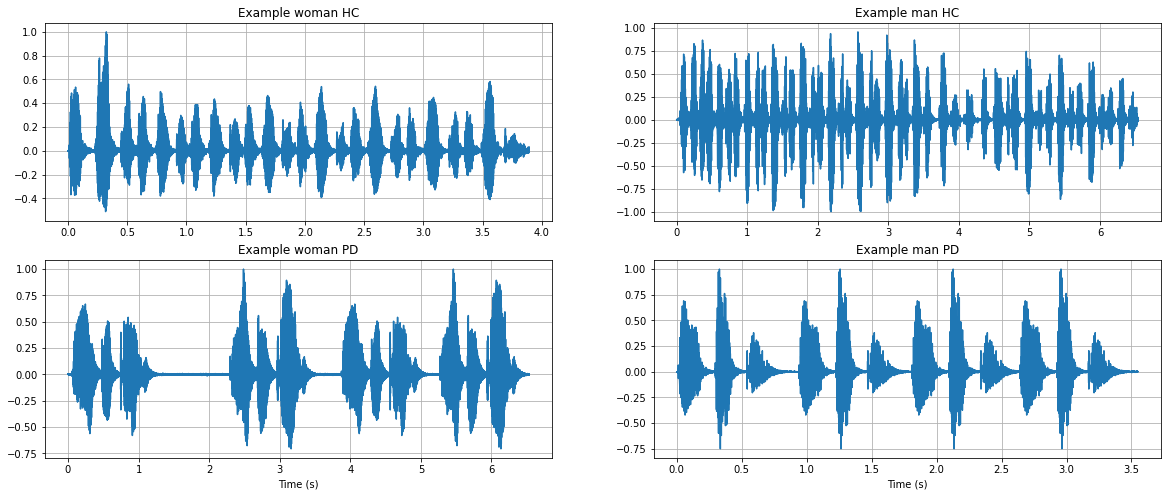

In [69]:
audio_wh = normalize_audio(audio_wh)
audio_mh = normalize_audio(audio_mh) 
audio_wp = normalize_audio(audio_wp)
audio_mp = normalize_audio(audio_mp)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

ax[0,0].set_title("Example woman HC")
#ax[0,0].set_xlabel("Time (s)")
ax[0,0].plot(np.linspace(0, len(audio_wh) / SAMPLE_RATE, num=len(audio_wh)), audio_wh)
ax[0,0].grid(True)

ax[0,1].set_title("Example man HC")
#ax[0,1].set_xlabel("Time (s)")
ax[0,1].plot(np.linspace(0, len(audio_mh) / SAMPLE_RATE, num=len(audio_mh)), audio_mh)
ax[0,1].grid(True)

ax[1,0].set_title("Example woman PD")
ax[1,0].set_xlabel("Time (s)")
ax[1,0].plot(np.linspace(0, len(audio_wp) / SAMPLE_RATE, num=len(audio_wp)), audio_wp)
ax[1,0].grid(True)

ax[1,1].set_title("Example man PD")
ax[1,1].set_xlabel("Time (s)")
ax[1,1].plot(np.linspace(0, len(audio_mp) / SAMPLE_RATE, num=len(audio_mp)), audio_mp)
ax[1,1].grid(True)

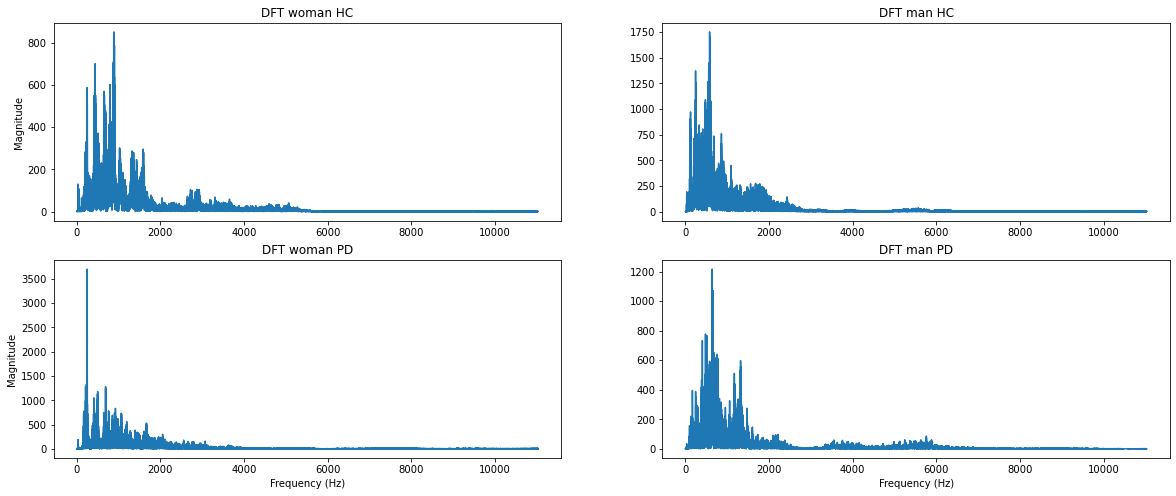

In [70]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fft_wh = np.fft.fft(audio_wh)
fft_mh = np.fft.fft(audio_mh)
fft_wp = np.fft.fft(audio_wp)
fft_mp = np.fft.fft(audio_mp)

# Magnitudes indicate the contribution of each frequency
magnitude_wh = np.abs(fft_wh)
magnitude_mh = np.abs(fft_mh)
magnitude_wp = np.abs(fft_wp)
magnitude_mp = np.abs(fft_mp)

# Mapping the magnitude to the relative frequency bins
frequency_wh = np.linspace(0, SAMPLE_RATE, len(magnitude_wh))
frequency_mh = np.linspace(0, SAMPLE_RATE, len(magnitude_mh))
frequency_wp = np.linspace(0, SAMPLE_RATE, len(magnitude_wp))
frequency_mp = np.linspace(0, SAMPLE_RATE, len(magnitude_mp))

# We only need the first half of the magnitude and frequency
left_mag_wh = magnitude_wh[:int(len(magnitude_wh)/2)]
left_freq_wh = frequency_wh[:int(len(frequency_wh)/2)]

left_mag_mh = magnitude_mh[:int(len(magnitude_mh)/2)]
left_freq_mh = frequency_mh[:int(len(frequency_mh)/2)]

left_mag_wp = magnitude_wp[:int(len(magnitude_wp)/2)]
left_freq_wp = frequency_wp[:int(len(frequency_wp)/2)]

left_mag_mp = magnitude_mp[:int(len(magnitude_mp)/2)]
left_freq_mp = frequency_mp[:int(len(frequency_mp)/2)]


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

ax[0,0].set_title("DFT woman HC")
ax[0,0].set_ylabel("Magnitude")
ax[0,0].plot(left_freq_wh[:int(len(left_freq_wh)/2)], left_mag_wh[:int(len(left_mag_wh)/2)])

ax[0,1].set_title("DFT man HC")
#ax[0,1].set_xlabel("Time (s)")
ax[0,1].plot(left_freq_mh[:int(len(left_freq_mh)/2)], left_mag_mh[:int(len(left_mag_mh)/2)])

ax[1,0].set_title("DFT woman PD")
ax[1,0].set_ylabel("Magnitude")
ax[1,0].set_xlabel("Frequency (Hz)")
ax[1,0].plot(left_freq_wp[:int(len(left_freq_wp)/2)], left_mag_wp[:int(len(left_mag_wp)/2)])

ax[1,1].set_title("DFT man PD")
ax[1,1].set_xlabel("Frequency (Hz)")
ax[1,1].plot(left_freq_mp[:int(len(left_freq_mp)/2)], left_mag_mp[:int(len(left_mag_mp)/2)])

In [71]:
FFT_size = 2048
#hop_size = 15 #ms

window = get_window("hann", FFT_size, fftbins=True)

In [72]:
hop_size = 1024
fmax = 12000

melspec_wh = librosa.feature.melspectrogram(y=audio_wh, sr=SAMPLE_RATE, window=window, n_fft=FFT_size, hop_length=hop_size, fmax=fmax)
melspec_mh = librosa.feature.melspectrogram(y=audio_mh, sr=SAMPLE_RATE, window=window, n_fft=FFT_size, hop_length=hop_size, fmax=fmax)
melspec_wp = librosa.feature.melspectrogram(y=audio_wp, sr=SAMPLE_RATE, window=window, n_fft=FFT_size, hop_length=hop_size, fmax=fmax)
melspec_mp = librosa.feature.melspectrogram(y=audio_mp, sr=SAMPLE_RATE, window=window, n_fft=FFT_size, hop_length=hop_size, fmax=fmax)

Text(0, 0.5, '')

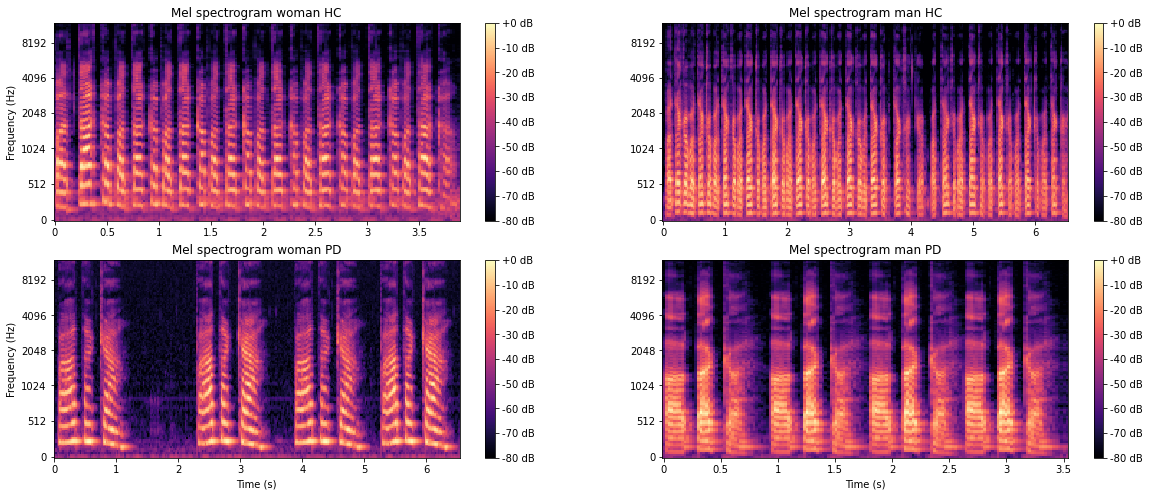

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

img_wh = libdisp.specshow(librosa.power_to_db(melspec_wh, ref=np.max), x_axis='time', y_axis='mel', fmax=fmax, ax=ax[0,0])
fig.colorbar(img_wh, format='%+2.0f dB', ax=[ax[0,0]])
ax[0,0].set_title("Mel spectrogram woman HC")
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Frequency (Hz)')

img_mh = libdisp.specshow(librosa.power_to_db(melspec_mh, ref=np.max), x_axis='time', y_axis='mel', fmax=fmax, ax=ax[0,1])
fig.colorbar(img_mh, format='%+2.0f dB', ax=[ax[0,1]])
ax[0,1].set_title("Mel spectrogram man HC")
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')

img_wp = libdisp.specshow(librosa.power_to_db(melspec_wp, ref=np.max), x_axis='time', y_axis='mel', fmax=fmax, ax=ax[1,0])
fig.colorbar(img_wp, format='%+2.0f dB', ax=[ax[1,0]])
ax[1,0].set_title("Mel spectrogram woman PD")
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel('Frequency (Hz)')

img_mp = libdisp.specshow(librosa.power_to_db(melspec_mp, ref=np.max), x_axis='time', y_axis='mel', fmax=fmax, ax=ax[1,1])
fig.colorbar(img_mp, format='%+2.0f dB', ax=[ax[1,1]])
ax[1,1].set_title("Mel spectrogram man PD")
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel('')


In [74]:
NUM_COEFFICIENTS = 40
#filename = 'HC/AVPEPUDEAC0003_pataka.wav'
filename = woman_healthy
audio, sr = librosa.core.load(PATH+'/'+filename, sr=SAMPLE_RATE)

In [75]:
MFCC_coefficients = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=NUM_COEFFICIENTS)
MFCC_coefficients

array([[-4.5415482e+02, -3.3359402e+02, -3.0738184e+02, ...,
        -5.3810040e+02, -5.4676306e+02, -5.3384760e+02],
       [ 1.5110797e+02,  2.0019794e+02,  2.2069321e+02, ...,
         1.5266092e+02,  1.4388206e+02,  1.4011142e+02],
       [ 6.6820545e+00, -2.0378605e+01, -4.9304729e+01, ...,
         5.3207012e+01,  5.4406872e+01,  4.3824135e+01],
       ...,
       [ 1.2378969e+00,  8.5818329e+00,  9.1534004e+00, ...,
         7.0577879e+00,  2.3715091e+00, -5.5466592e-01],
       [-2.4644761e+00,  5.7635417e+00,  1.1879034e+01, ...,
         7.2200971e+00,  3.8479857e+00,  6.3586879e-01],
       [-6.7902389e+00,  5.7160916e+00,  1.6223534e+01, ...,
         6.9929276e+00,  3.9991493e+00, -5.7618797e-02]], dtype=float32)

In [76]:
#plt.figure(figsize=(15,5))
#plt.plot(np.linspace(0, len(audio_wh) / sample_rate, num=len(audio_wh)), audio_wh)
#plt.imshow(MFCC_coefficients, aspect='auto', origin='lower')

In [77]:
#plt.figure(figsize=(15,5))
#img = librosa.display.specshow(MFCC_coefficients, x_axis='time')
#plt.colorbar(img)

#plt.title('MFCC')